In [13]:
from functools import reduce
import itertools

import numpy as np
import pandas as pd

from sklearn import datasets, linear_model, preprocessing
from sklearn.metrics import mean_squared_error, r2_score

from matplotlib import pyplot as plt 
import seaborn as sns
# import holoviews

from data_exploration import plot_happiness

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('seaborn')

In [2]:
data = pd.read_csv("./Data/data.csv")
data['GDP per Capita'] = data['GDP per Capita'].replace('[\$,]', '', regex=True).astype(float)
data

,Country,Region_x,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Afghanistan,Middle East/Central Asia,29.82,0.46,614.66,0.30,0.20,0.08,0.18,0.00,...,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
1,Albania,Northern/Eastern Europe,3.16,0.73,4534.37,0.78,0.22,0.25,0.87,0.02,...,4.655,4.546,4.764,0.95530,0.50163,0.73007,0.31866,0.05301,0.16840,1.92816
2,Algeria,Africa,38.48,0.73,5430.57,0.60,0.16,0.17,1.14,0.01,...,6.355,6.227,6.483,1.05266,0.83309,0.61804,0.21006,0.16157,0.07044,3.40904
3,Angola,Africa,20.82,0.52,4665.91,0.33,0.15,0.12,0.20,0.09,...,3.866,3.753,3.979,0.84731,0.66366,0.04991,0.00589,0.08434,0.12071,2.09459
4,Argentina,Latin America,41.09,0.83,13540.00,0.78,0.79,0.29,1.08,0.10,...,6.650,6.560,6.740,1.15137,1.06612,0.69711,0.42284,0.07296,0.10989,3.12985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Uzbekistan,Middle East/Central Asia,28.54,0.67,1560.85,0.62,0.13,0.08,1.41,0.00,...,5.987,5.896,6.078,0.73591,1.16810,0.50163,0.60848,0.28333,0.34326,2.34638
124,Vietnam,Asia-Pacific,90.80,0.66,1532.31,0.50,0.01,0.19,0.79,0.05,...,5.061,4.991,5.131,0.74037,0.79117,0.66157,0.55954,0.11556,0.25075,1.94180
125,Yemen,Middle East/Central Asia,23.85,0.50,1302.30,0.34,0.14,0.04,0.42,0.04,...,3.724,3.621,3.827,0.57939,0.47493,0.31048,0.22870,0.05892,0.09821,1.97295
126,Zambia,Africa,14.08,0.58,1740.64,0.19,0.18,0.33,0.24,0.01,...,4.795,4.645,4.945,0.61202,0.63760,0.23573,0.42662,0.11479,0.17866,2.58991


In [14]:
data.columns

Index(['Country', 'Region_x', 'Population (millions)', 'HDI', 'GDP per Capita',
       'Cropland Footprint', 'Grazing Footprint', 'Forest Footprint',
       'Carbon Footprint', 'Fish Footprint', 'Total Ecological Footprint',
       'Cropland', 'Grazing Land', 'Forest Land', 'Fishing Water',
       'Urban Land', 'Total Biocapacity', 'Biocapacity Deficit or Reserve',
       'Earths Required', 'Countries Required', 'Data Quality', 'Region_y',
       'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval',
       'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'GDP range'],
      dtype='object')

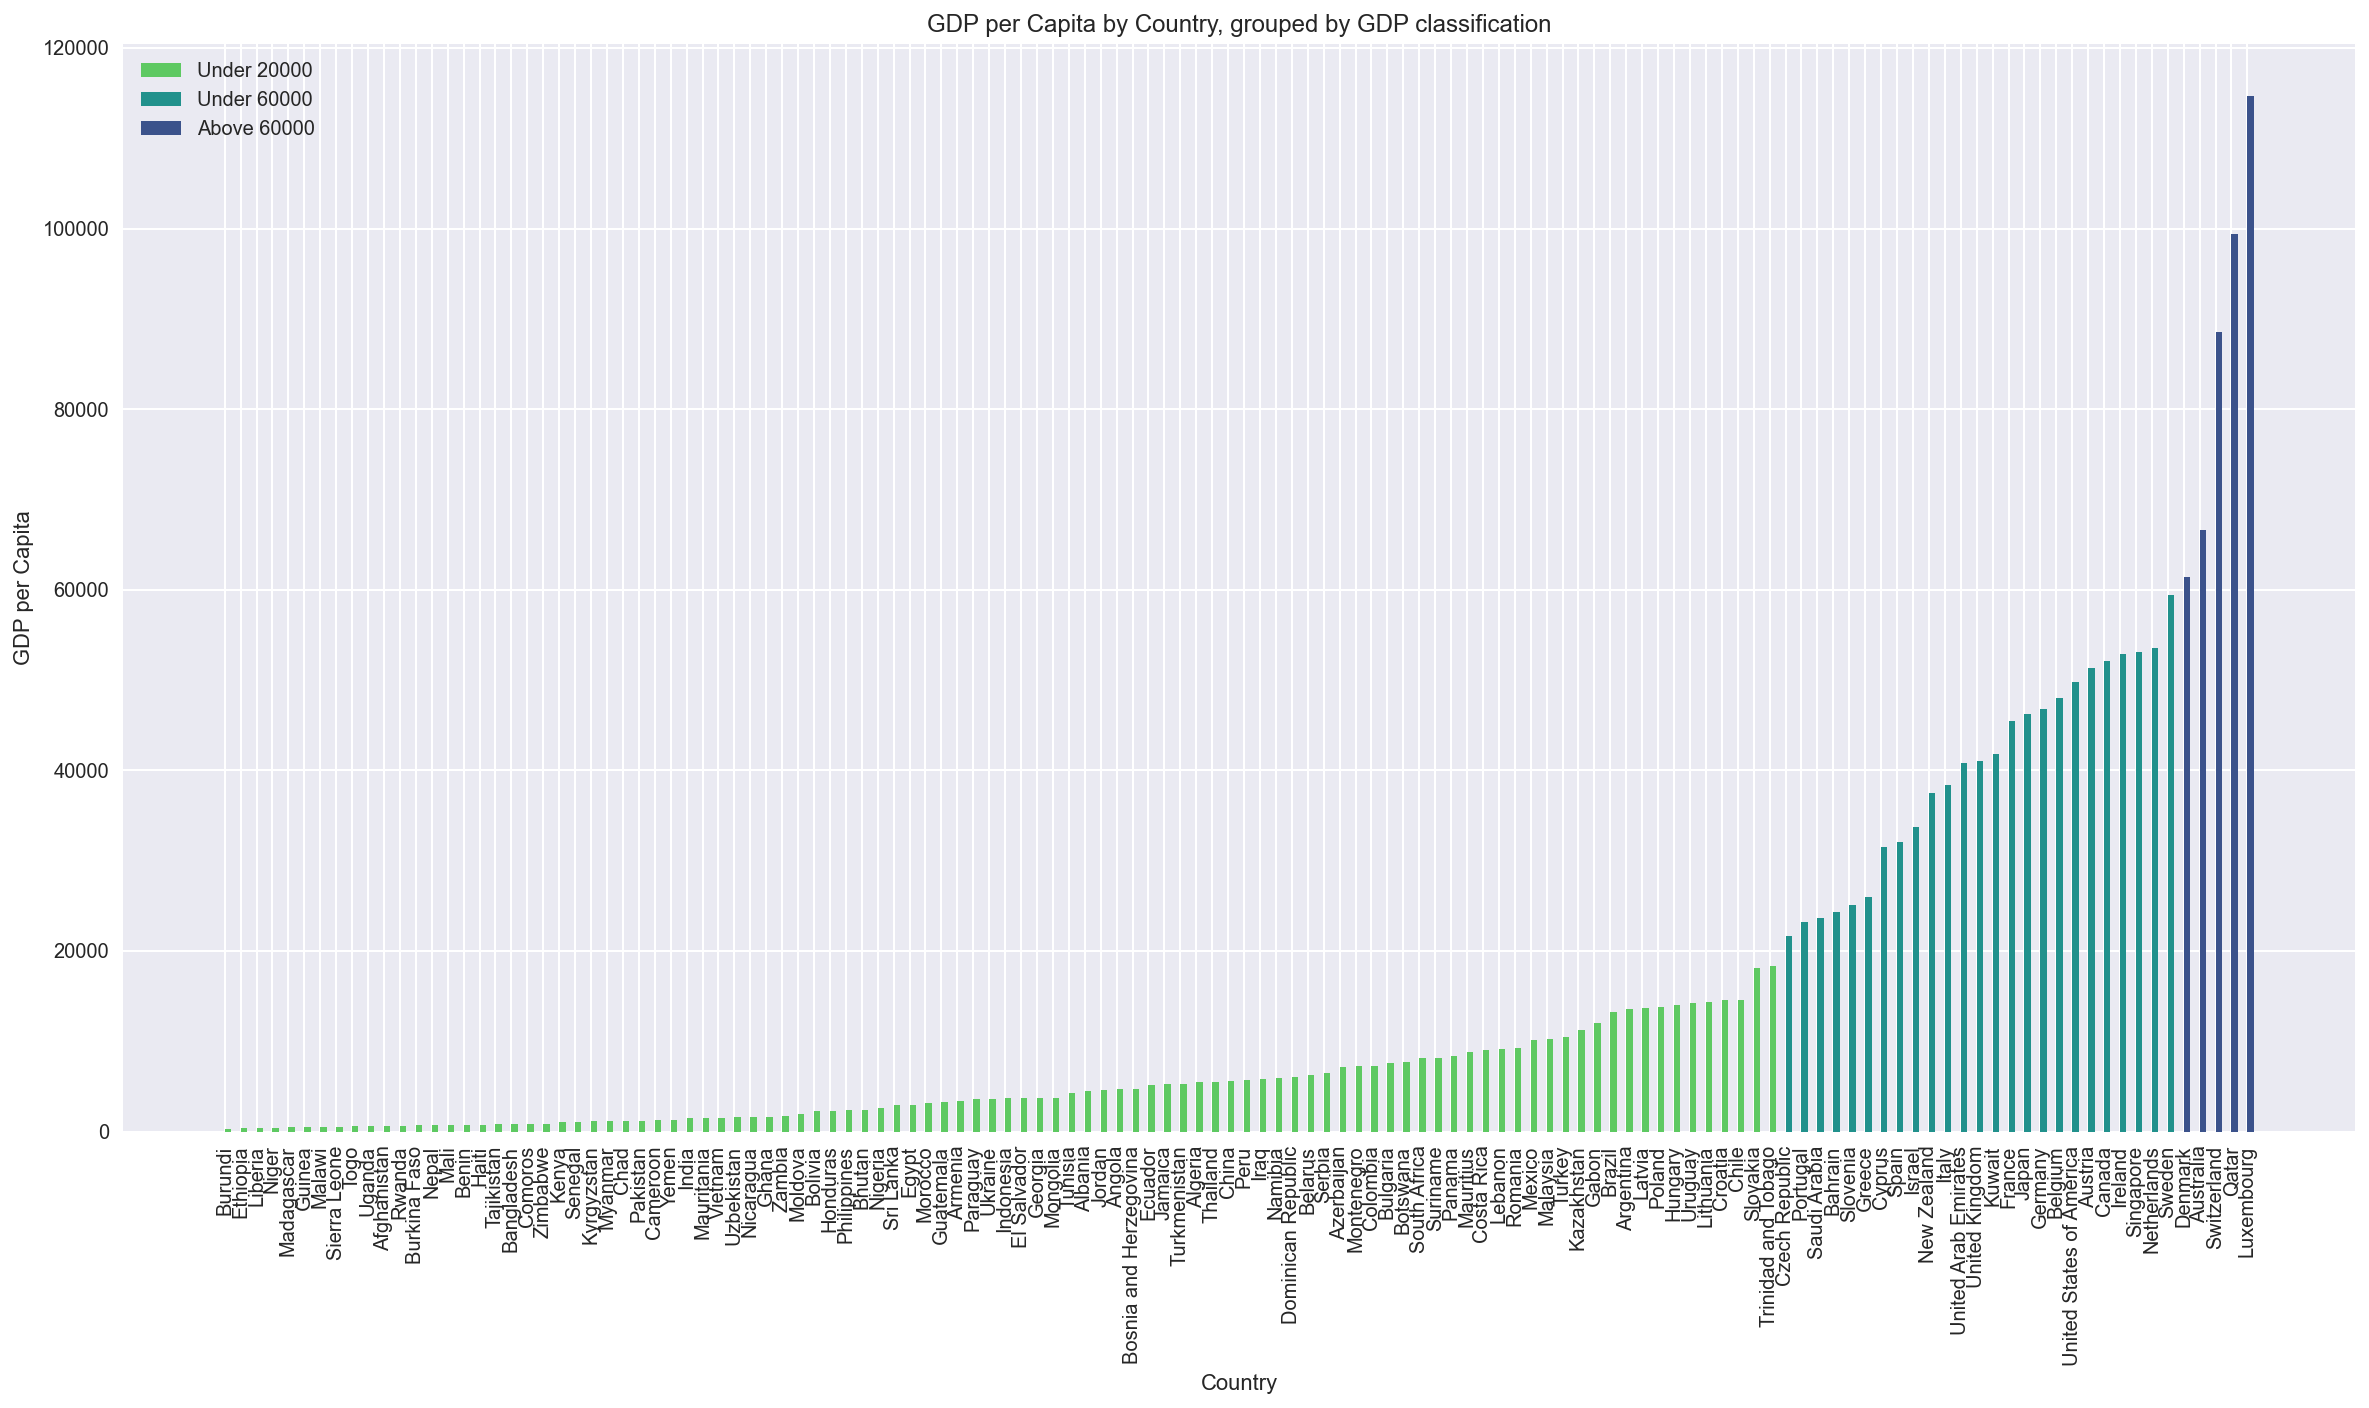

In [15]:
plot_happiness(data)

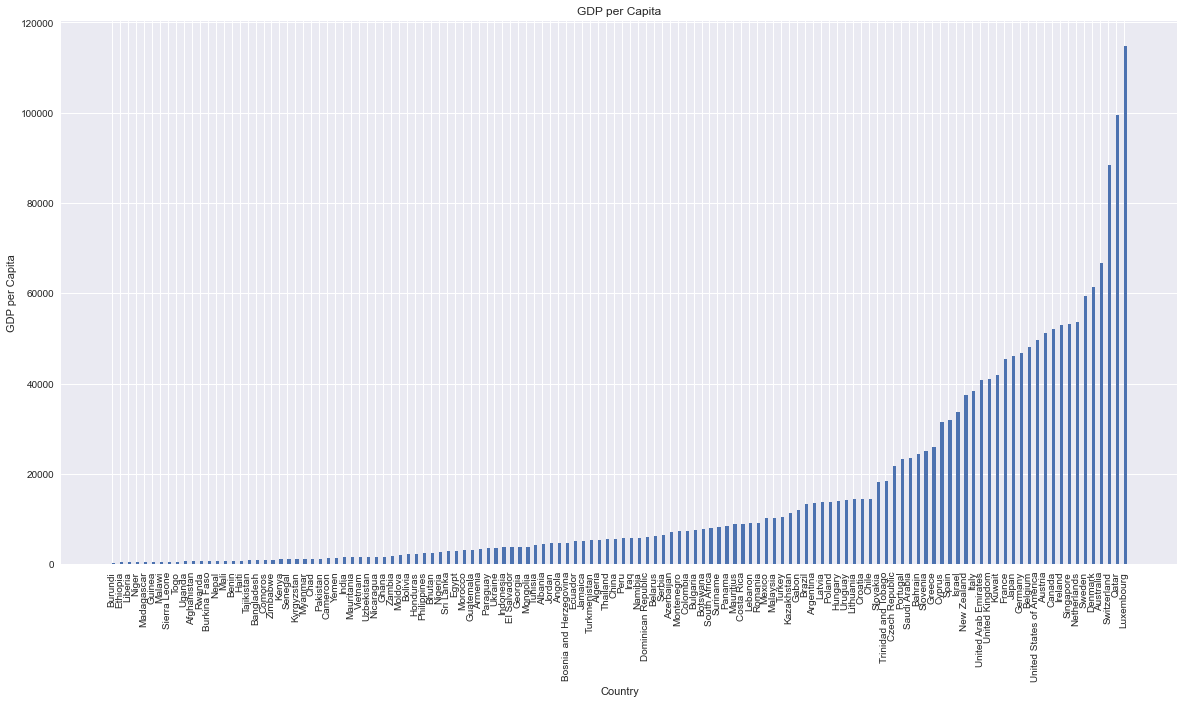

In [5]:
plt.style.use('seaborn')

plt.figure(figsize=(20,10))
#plt.scatter(data_Happiness_footprint['Country'],data_Happiness_footprint['GDP per Capita'], marker='o', color='r')
plt.bar(data_Happiness_footprint['Country'],data_Happiness_footprint['GDP per Capita'], width=.4, align='edge')
plt.xticks(rotation=90)
plt.title('GDP per Capita')
plt.xlabel('Country')
plt.ylabel('GDP per Capita')
plt.show()

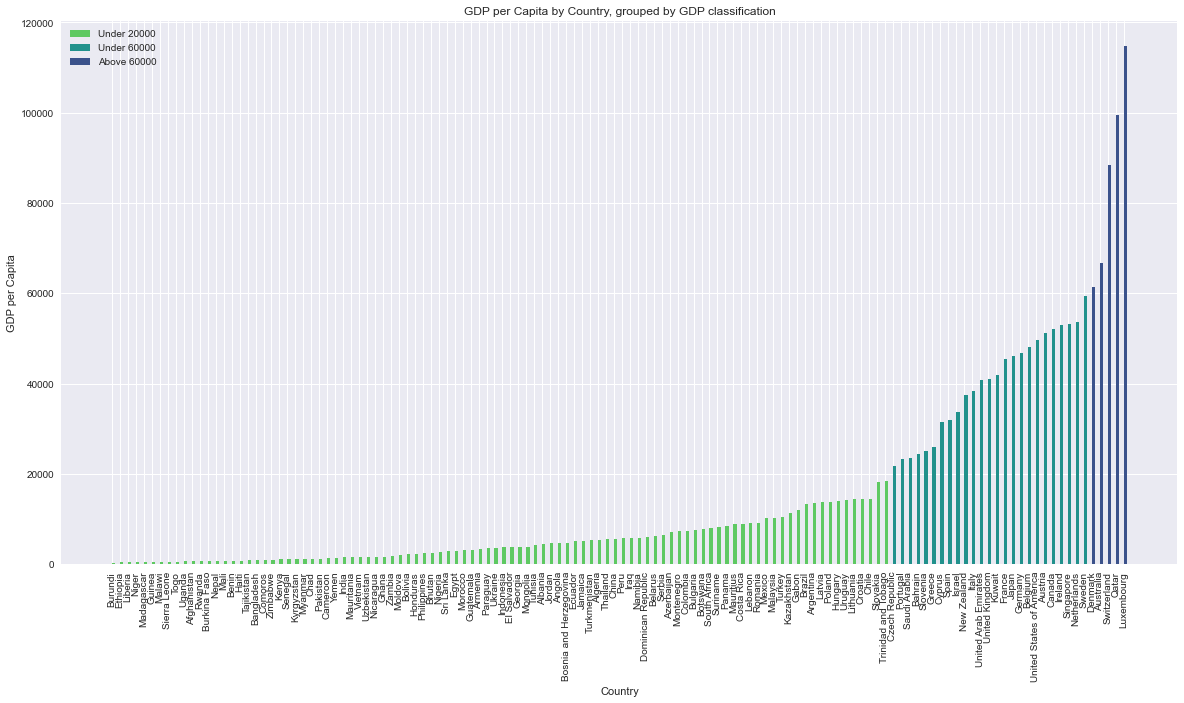

In [11]:
data_Happiness_footprint = data[['Country','Happiness Score', 'HDI', 'GDP per Capita','Cropland Footprint', 'Grazing Footprint', 'Forest Footprint',
       'Carbon Footprint', 'Fish Footprint', 'Total Ecological Footprint']].sort_values(by='GDP per Capita')

GDP_category_list = []
for item in data_Happiness_footprint['GDP per Capita']:
    category = ''
    if item < 20000:
        category = 'Under 20000'
    elif item < 60000:
        category = 'Under 60000'
    else:
        category = 'Above 60000'
    GDP_category_list.append(category)
data_Happiness_footprint['GDP range'] = GDP_category_list
data['GDP range'] = GDP_category_list

plt.figure(figsize=(20, 10))
l = ['Under 20000', 'Under 60000', 'Above 60000']
gdpColors = list(reversed(sns.color_palette("viridis",as_cmap=False,n_colors=3)))

for i, (k, d) in enumerate(sorted(data_Happiness_footprint.groupby('GDP range'), key=lambda x:l.index(x[0]))):
    plt.bar(d.Country, d['GDP per Capita'], width=.4, align='edge', color=gdpColors[i])
    plt.xticks(rotation=90)
plt.ylabel("GDP per Capita")
plt.xlabel("Country")
plt.title("GDP per Capita by Country, grouped by GDP classification")
plt.legend(l)
plt.savefig('GDP vs Country.png')
plt.show()


{'Middle East/Central Asia':                   Country                  Region_x  \
 54                 Israel  Middle East/Central Asia   
 120  United Arab Emirates  Middle East/Central Asia   
 97           Saudi Arabia  Middle East/Central Asia   
 94                  Qatar  Middle East/Central Asia   
 61                 Kuwait  Middle East/Central Asia   
 9                 Bahrain  Middle East/Central Asia   
 122            Uzbekistan  Middle East/Central Asia   
 59             Kazakhstan  Middle East/Central Asia   
 116          Turkmenistan  Middle East/Central Asia   
 115                Turkey  Middle East/Central Asia   
 58                 Jordan  Middle East/Central Asia   
 8              Azerbaijan  Middle East/Central Asia   
 62             Kyrgyzstan  Middle East/Central Asia   
 64                Lebanon  Middle East/Central Asia   
 110            Tajikistan  Middle East/Central Asia   
 52                   Iraq  Middle East/Central Asia   
 5                 A